In [42]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [43]:
tf.__version__

'2.16.1'

In [44]:
model = tf.keras.applications.ResNet50(weights='imagenet')

In [45]:
sample_image = tf.keras.preprocessing.image.load_img('bicycle.jpg',target_size=(224,224))

In [46]:
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)#transformer l'image en array

In [47]:
import numpy as np
np.shape(sample_image)

(224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


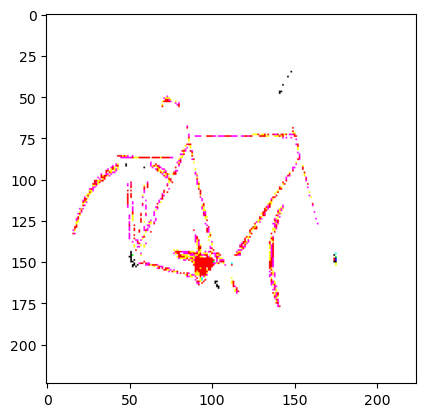

In [48]:
plt.imshow(sample_image)

In [49]:
sample_image = np.expand_dims(sample_image,axis=0)
np.shape(sample_image)

(1, 224, 224, 3)

In [50]:
sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)#charger l'image pour qu'elle entre dans le model predefini en haut

In [51]:
predictions = model.predict(sample_image)
print('predictions :', tf.keras.applications.resnet50.decode_predictions(predictions,top=50)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 998ms/step
predictions : [('n02835271', 'bicycle-built-for-two', 0.43338233), ('n03208938', 'disk_brake', 0.12137739), ('n04482393', 'tricycle', 0.10350137), ('n03792782', 'mountain_bike', 0.05258527), ('n02708093', 'analog_clock', 0.024840102), ('n04557648', 'water_bottle', 0.015490132), ('n03706229', 'magnetic_compass', 0.014301064), ('n04485082', 'tripod', 0.013913387), ('n03876231', 'paintbrush', 0.011939224), ('n04367480', 'swab', 0.009493125), ('n03891332', 'parking_meter', 0.008543747), ('n02110063', 'malamute', 0.0068188934), ('n04548280', 'wall_clock', 0.0058981483), ('n03967562', 'plow', 0.0049694926), ('n03930313', 'picket_fence', 0.0046672416), ('n03141823', 'crutch', 0.0042432505), ('n04328186', 'stopwatch', 0.0039829803), ('n03498962', 'hatchet', 0.003675699), ('n04235860', 'sleeping_bag', 0.0035092353), ('n02769748', 'backpack', 0.0033846244), ('n04507155', 'umbrella', 0.003326583), ('n03124170', 'cowboy_hat', 0.0033140231), ('n02909870', 'buc

In [52]:
# Transfer learning sur les données locales 
model = tf.keras.applications.ResNet50(weights= 'imagenet', include_top=False)

In [53]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, None,      │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,472 │ conv1_pad[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, None,      │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, None,      │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, None,      │          0 │ conv2_block1_2_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, None,      │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, None,      │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, None,      │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [54]:
for i, layer in enumerate(model.layers):
    print(i,layer.name)

0 input_layer_5
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block

In [55]:
x = model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [56]:
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dense(512,activation='relu')(x)
preds = tf.keras.layers.Dense(1,activation='sigmoid')(x)

In [57]:
model = tf.keras.models.Model(inputs = model.input, outputs= preds)

In [58]:
print(model.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, None,      │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,472 │ conv1_pad[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, None,      │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, None,      │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, None,      │          0 │ conv2_block1_2_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, None,      │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, None,      │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, None,      │      1,024 │ conv2_block1_3_c

 Total params: 28,310,401 (108.00 MB)

 Trainable params: 28,257,281 (107.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


In [59]:
# on doit donnée au modele en bloquand les poids qu'il risque mettre par defaut
# si on entraine directement le modele il risque supprimier les poid qui étaient deja la 
for layer in model.layers[:175]:
    layer.trainable = False

In [60]:
for layer in model.layers[:175]:
    layer.trainable = True

In [61]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function= tf.keras.applications.resnet50.preprocess_input)

In [62]:
train_generator = train_datagen.flow_from_directory('training_set',
                                             target_size=(224,224),color_mode= 'rgb',
                                             batch_size = 32,class_mode = 'binary',shuffle=True)

Found 115 images belonging to 2 classes.


In [63]:
model.compile(optimizer='adam',loss='binary_crossentropy',
                   metrics=['accuracy'])

In [64]:
# entrainement 
hist = model.fit(train_generator, epochs=5)

Epoch 1/5


c:\Users\ffoue\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.5591 - loss: 1.2882
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7659 - loss: 0.4648
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.9450 - loss: 0.1433
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9608 - loss: 0.1882
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.9383 - loss: 0.2658


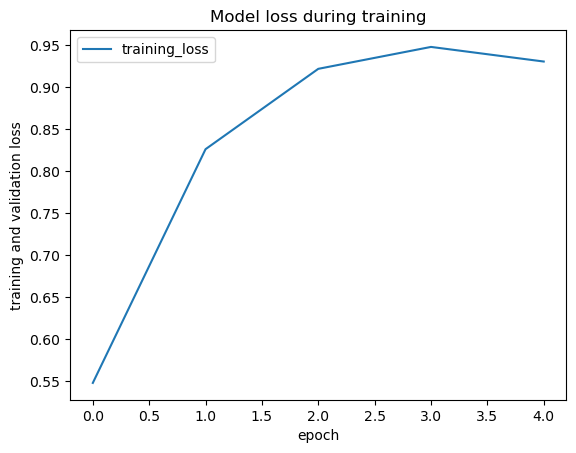

In [65]:

plt.plot(hist.history['accuracy'])

plt.title('Model loss during training')
plt.xlabel('epoch')
plt.ylabel('training and validation loss')
plt.legend(['training_loss','Validation_loss'])

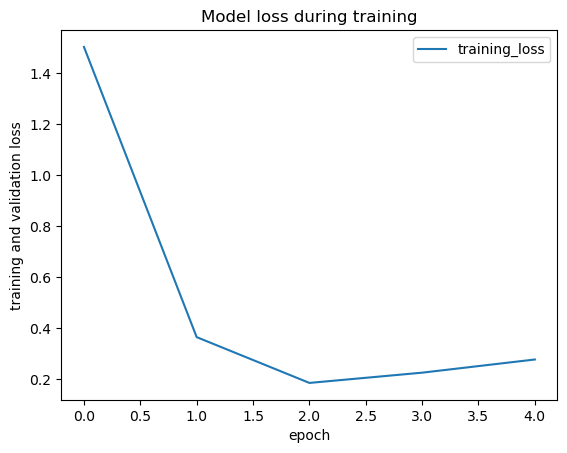

In [73]:

plt.plot(hist.history['loss'])

plt.title('Model loss during training')
plt.xlabel('epoch')
plt.ylabel('training and validation loss')
plt.legend(['training_loss','Validation_loss'])

In [67]:
sample_image = tf.keras.preprocessing.image.load_img('cat_pour_transfer.jpg',target_size=(224,224))

In [69]:
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)

In [70]:
sample_image=np.expand_dims(sample_image,axis=0)
np.shape(sample_image)

(1, 224, 224, 3)

In [71]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [72]:
sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)
predictions = model.predict(sample_image)
print('predictions:',predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predictions: [[0.]]
